In [2]:
import pandas as pd

penguins = pd.read_csv("/content/penguins_size.csv")

penguins.info()
penguins.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
penguins = penguins.dropna()
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [5]:
penguins.drop(['island', 'sex'], axis=1, inplace=True)
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,39.1,18.7,181.0,3750.0
1,Adelie,39.5,17.4,186.0,3800.0
2,Adelie,40.3,18.0,195.0,3250.0
4,Adelie,36.7,19.3,193.0,3450.0
5,Adelie,39.3,20.6,190.0,3650.0


In [6]:
X = penguins[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
y = penguins["species"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model = tree_model.fit(X_train, y_train)

In [9]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)
acc_score = round(accuracy_score(y_pred, y_test), 3)

print("Accuracy: ", acc_score)

Accuracy:  1.0


In [10]:
print(tree_model.predict([["40.0", "39.5", "195.0", "3450.0"]])[0])

Adelie


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [13]:
from sklearn.tree import export_graphviz

export_graphviz (
    tree_model,
    out_file="penguins_tree.dot",
    feature_names=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"],
    class_names=["Chinstrap", "Adelie", "Gentoo"],
    rounded=True,
    filled=True
)

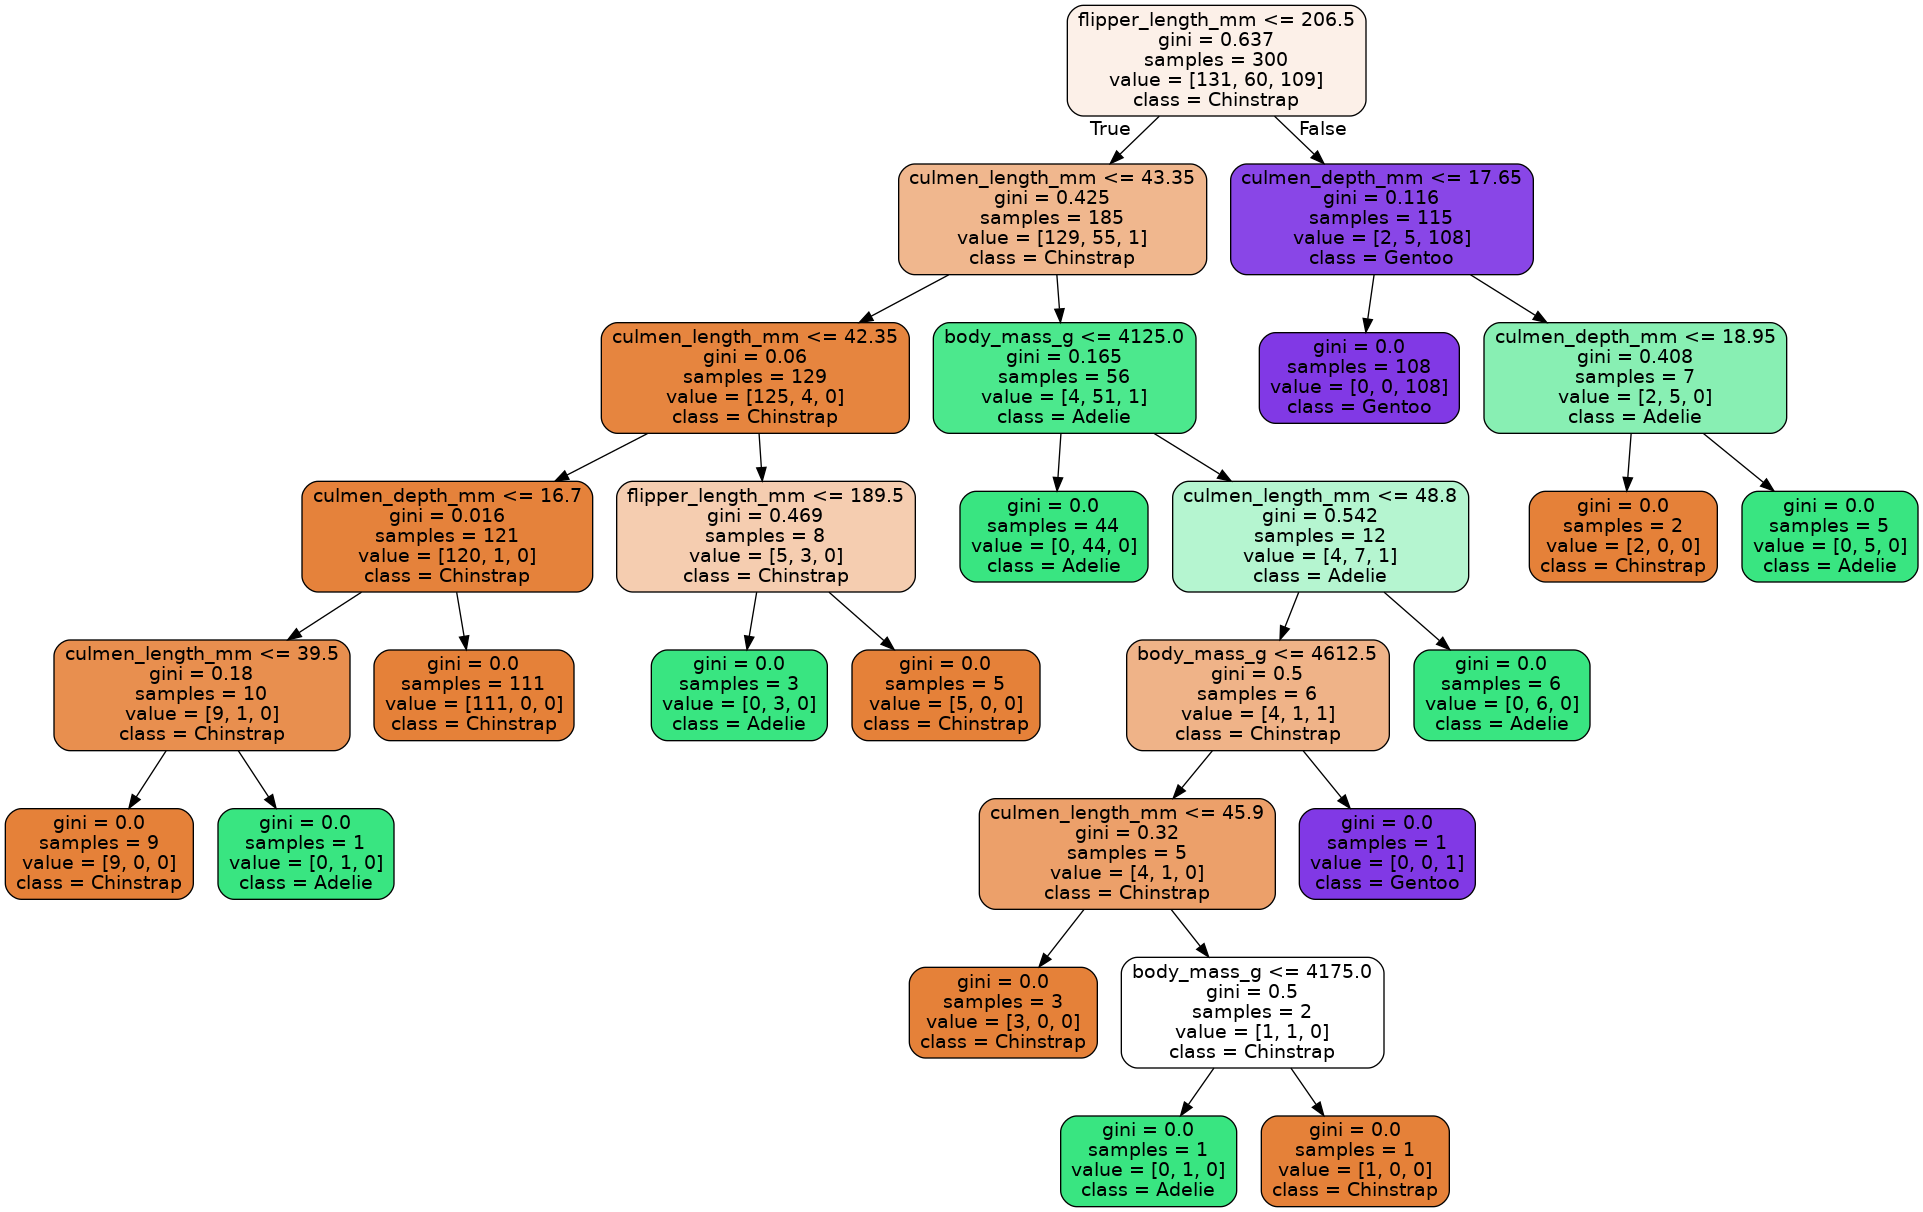